# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania 1 pkt


In [77]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

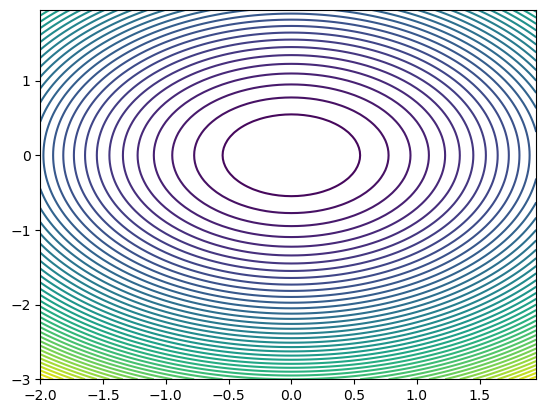

In [78]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

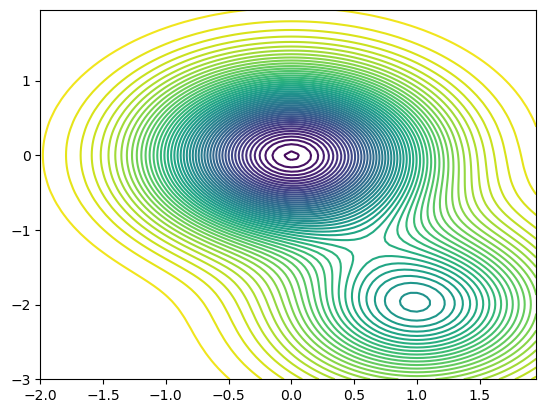

In [79]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [83]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0], self.trace[:,1], s=10)

    def calculate_func_value(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    # return the next positions, not the deltas
    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        # get direction of step (gradient), move by alpha
        xdir,ydir = self.calculate_func_grad(x1,x2)
        return (x1-xdir*self.alpha,x2-ydir*self.alpha) # negative gradient!!!
        
        

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
        points = []
        for _ in range(steps):
            x1_init,x2_init=self.gradient_descent_step(x1_init,x2_init)
            if plot:
                points.append([x1_init,x2_init])
        if plot:
            self.trace=np.array(points)
            self.plot_func()
        return {"minimal value:":self.calculate_func_value(x1_init,x2_init),"x":x1_init,"y":x2_init}

# Funkcja 1

{'minimal value:': 0.0001329227995784916, 'x': 0.0, 'y': 0.01152921504606847}
{'minimal value:': 0.0002658455991569832, 'x': 0.01152921504606847, 'y': 0.01152921504606847}


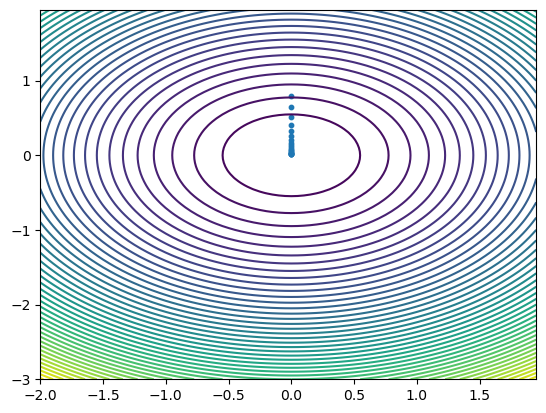

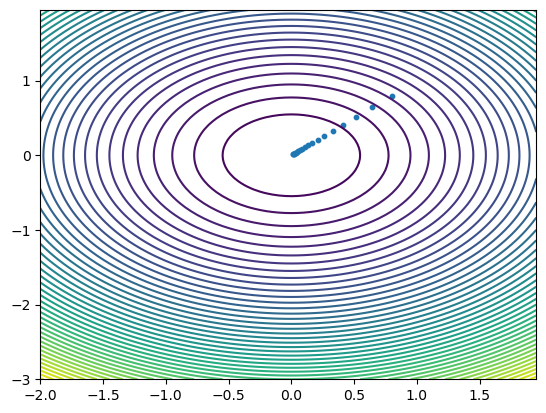

In [92]:
fun1 = SimpleGradientDescent(lambda x,y : x**2 + y**2, lambda a,b: (2*a,2*b))
print(fun1.minimize(0,1,20,plot=True))
print(fun1.minimize(1,1,20,plot=True))

# Funkcja 2

{'minimal value:': 0.4965724836763416, 'x': 0.003476013763306673, 'y': -0.006952027526613346}
{'minimal value:': 0.992742092022676, 'x': 0.9845100615111927, 'y': -1.9690201230223854}
{'minimal value:': 0.4965724836763416, 'x': 0.003476013763306673, 'y': -0.006952027526613346}
{'minimal value:': 0.4965724836763416, 'x': 0.0034760137633066744, 'y': -0.006952027526613353}


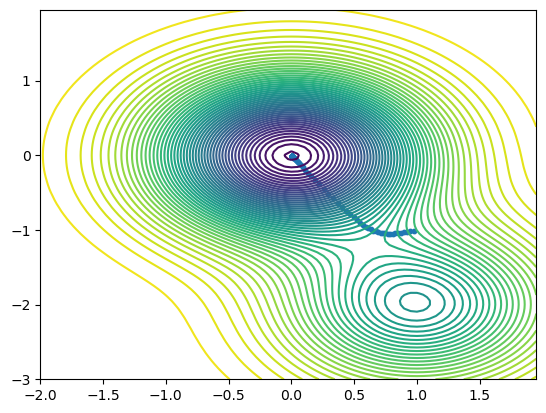

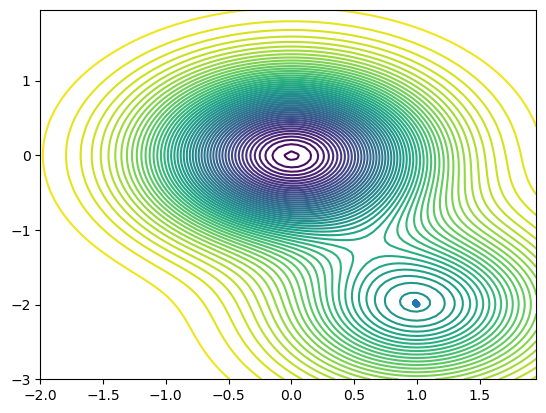

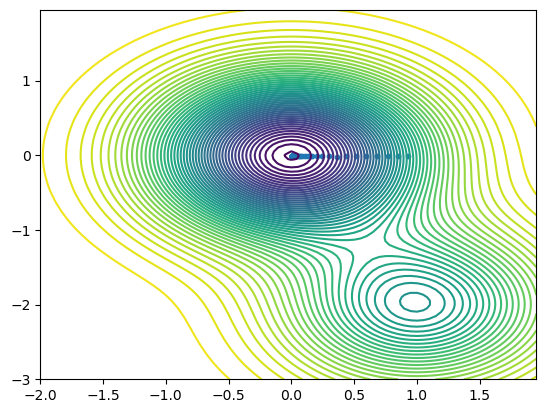

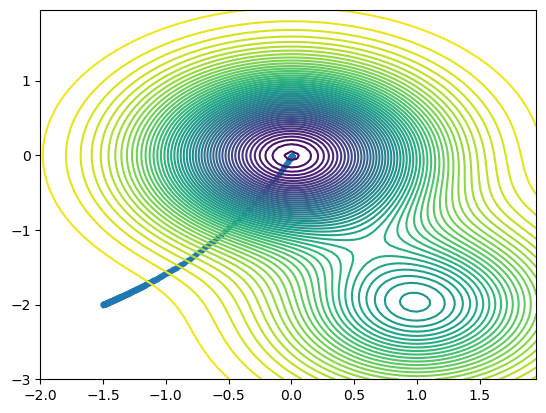

In [93]:
def funct(x,y):
    return 1.5-np.exp(-x**(2)-y**(2))-0.5*np.exp(-(x-1)**(2)-(y+2)**(2))

def grad(x,y):
    return (2*x*np.exp(-x**(2)-y**(2))+(x-1)*np.exp(-(x-1)**(2)-(y+2)**(2)),2*y*np.exp(-x**(2)-y**(2))+(y+2)*np.exp(-(x-1)**(2)-(y+2)**(2)))

fun2 = SimpleGradientDescent(funct,grad)

print(fun2.minimize(1,-1,400,plot=True))
print(fun2.minimize(1,-2,400,plot=True))
print(fun2.minimize(1,0,400,plot=True))
print(fun2.minimize(-1.5,-2,400,plot=True))
